In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.probability import FreqDist
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
tweet_df=pd.read_csv('apple-twitter-sentiment-texts.csv')

In [3]:
tweet_df.head(5)

text  sentiment
0  Wow. Yall needa step it up @Apple RT @heynyla:...         -1
1  What Happened To Apple Inc?   http://t.co/FJEX...          0
2  Thank u @apple I can now compile all of the pi...          1
3  The oddly uplifting story of the Apple co-foun...          0
4  @apple can i exchange my iphone for a differen...          0

In [4]:
#data type info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


# Preprocessing the dataset

In [5]:
def all_remove_pattern(txt):
    txt = re.sub(r'@[A-Za-z0-9]+','',txt)
    return txt

In [6]:
#rempve twitter handler
tweet_df['cleaned_tweet']=tweet_df['text'].apply(all_remove_pattern)

In [7]:
tweet_df

text  sentiment  \
0     Wow. Yall needa step it up @Apple RT @heynyla:...         -1   
1     What Happened To Apple Inc?   http://t.co/FJEX...          0   
2     Thank u @apple I can now compile all of the pi...          1   
3     The oddly uplifting story of the Apple co-foun...          0   
4     @apple can i exchange my iphone for a differen...          0   
...                                                 ...        ...   
1625     Those** PICK UP THE SLACK YOU FUCK BOYS @Apple         -1   
1626  Finally got my iPhone 6 in the mail and it com...         -1   
1627  @umo_games @Apple ended up getting a new compu...          0   
1628  The 19-Year-Old #WizKid Who Turned Down @Apple...          0   
1629  The iPhone 6 May Have A Longer Upgrade Cycle -...         -1   

                                          cleaned_tweet  
0     Wow. Yall needa step it up  RT : Music and sna...  
1     What Happened To Apple Inc?   http://t.co/FJEX...  
2     Thank u  I can now compile all of the pics tha...  
3     The oddly uplifting story of the Apple co-foun...  
4      can i exchange my iphone for a different colo...  
...                                                 ...  
1625           Those** PICK UP THE SLACK YOU FUCK BOYS   
1626  Finally got my iPhone 6 in the mail and it com...  
1627  _games  ended up getting a new computer anyhow...  
1628  The 19-Year-Old #WizKid Who Turned Down  Has N...  
1629  The iPhone 6 May Have A Longer Upgrade Cycle -...  

[1630 rows x 3 columns]

In [8]:
#remove special characters, numbers, and punctuations
tweet_df['cleaned_tweet'] = tweet_df['cleaned_tweet'].str.replace('[^a-zA-Z#]', ' ',regex=True)

In [9]:
tweet_df

text  sentiment  \
0     Wow. Yall needa step it up @Apple RT @heynyla:...         -1   
1     What Happened To Apple Inc?   http://t.co/FJEX...          0   
2     Thank u @apple I can now compile all of the pi...          1   
3     The oddly uplifting story of the Apple co-foun...          0   
4     @apple can i exchange my iphone for a differen...          0   
...                                                 ...        ...   
1625     Those** PICK UP THE SLACK YOU FUCK BOYS @Apple         -1   
1626  Finally got my iPhone 6 in the mail and it com...         -1   
1627  @umo_games @Apple ended up getting a new compu...          0   
1628  The 19-Year-Old #WizKid Who Turned Down @Apple...          0   
1629  The iPhone 6 May Have A Longer Upgrade Cycle -...         -1   

                                          cleaned_tweet  
0     Wow  Yall needa step it up  RT   Music and sna...  
1     What Happened To Apple Inc    http   t co FJEX...  
2     Thank u  I can now compile all of the pics tha...  
3     The oddly uplifting story of the Apple co foun...  
4      can i exchange my iphone for a different colo...  
...                                                 ...  
1625           Those   PICK UP THE SLACK YOU FUCK BOYS   
1626  Finally got my iPhone   in the mail and it com...  
1627   games  ended up getting a new computer anyhow...  
1628  The    Year Old #WizKid Who Turned Down  Has N...  
1629  The iPhone   May Have A Longer Upgrade Cycle  ...  

[1630 rows x 3 columns]

In [10]:
#remove short words
stop_words = stopwords.words('english')

In [11]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

In [12]:
tweet_df['cleaned_tweet'] = tweet_df['cleaned_tweet'].apply(remove_stopwords)

In [13]:
tweet_df

text  sentiment  \
0     Wow. Yall needa step it up @Apple RT @heynyla:...         -1   
1     What Happened To Apple Inc?   http://t.co/FJEX...          0   
2     Thank u @apple I can now compile all of the pi...          1   
3     The oddly uplifting story of the Apple co-foun...          0   
4     @apple can i exchange my iphone for a differen...          0   
...                                                 ...        ...   
1625     Those** PICK UP THE SLACK YOU FUCK BOYS @Apple         -1   
1626  Finally got my iPhone 6 in the mail and it com...         -1   
1627  @umo_games @Apple ended up getting a new compu...          0   
1628  The 19-Year-Old #WizKid Who Turned Down @Apple...          0   
1629  The iPhone 6 May Have A Longer Upgrade Cycle -...         -1   

                                          cleaned_tweet  
0     Wow Yall needa step RT Music snapchat damn tim...  
1     Happened Apple Inc http co FJEXI oP U #aapl #a...  
2     Thank u compile pics communicate one place htt...  
3     oddly uplifting story Apple co founder sold st...  
4     exchange iphone different color lmao changed mind  
...                                                 ...  
1625                               PICK SLACK FUCK BOYS  
1626  Finally got iPhone mail comes box busted scree...  
1627  games ended getting new computer anyhow work c...  
1628  Year Old #WizKid Turned Nabbed Backing #Hollyw...  
1629  iPhone May Longer Upgrade Cycle Expect Unit Sa...  

[1630 rows x 3 columns]

In [14]:
pattern = r'\w+|#\S+'
tweet_df['tokenized_words'] = tweet_df['cleaned_tweet'].apply(lambda text: regexp_tokenize(text, pattern))

In [15]:
tweet_df

text  sentiment  \
0     Wow. Yall needa step it up @Apple RT @heynyla:...         -1   
1     What Happened To Apple Inc?   http://t.co/FJEX...          0   
2     Thank u @apple I can now compile all of the pi...          1   
3     The oddly uplifting story of the Apple co-foun...          0   
4     @apple can i exchange my iphone for a differen...          0   
...                                                 ...        ...   
1625     Those** PICK UP THE SLACK YOU FUCK BOYS @Apple         -1   
1626  Finally got my iPhone 6 in the mail and it com...         -1   
1627  @umo_games @Apple ended up getting a new compu...          0   
1628  The 19-Year-Old #WizKid Who Turned Down @Apple...          0   
1629  The iPhone 6 May Have A Longer Upgrade Cycle -...         -1   

                                          cleaned_tweet  \
0     Wow Yall needa step RT Music snapchat damn tim...   
1     Happened Apple Inc http co FJEXI oP U #aapl #a...   
2     Thank u compile pics communicate one place htt...   
3     oddly uplifting story Apple co founder sold st...   
4     exchange iphone different color lmao changed mind   
...                                                 ...   
1625                               PICK SLACK FUCK BOYS   
1626  Finally got iPhone mail comes box busted scree...   
1627  games ended getting new computer anyhow work c...   
1628  Year Old #WizKid Turned Nabbed Backing #Hollyw...   
1629  iPhone May Longer Upgrade Cycle Expect Unit Sa...   

                                        tokenized_words  
0     [Wow, Yall, needa, step, RT, Music, snapchat, ...  
1     [Happened, Apple, Inc, http, co, FJEXI, oP, U,...  
2     [Thank, u, compile, pics, communicate, one, pl...  
3     [oddly, uplifting, story, Apple, co, founder, ...  
4     [exchange, iphone, different, color, lmao, cha...  
...                                                 ...  
1625                          [PICK, SLACK, FUCK, BOYS]  
1626  [Finally, got, iPhone, mail, comes, box, buste...  
1627  [games, ended, getting, new, computer, anyhow,...  
1628  [Year, Old, #WizKid, Turned, Nabbed, Backing, ...  
1629  [iPhone, May, Longer, Upgrade, Cycle, Expect, ...  

[1630 rows x 4 columns]

In [16]:
#stem the words
from nltk.stem.porter import PorterStemmer  # Corrected import
stemmer = PorterStemmer()

In [17]:
# Function to stem words in a tweet
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply the stem_words function to the 'tokenized_words' column
tweet_df['stemmed_words'] = tweet_df['tokenized_words'].apply(stem_words)

In [18]:
tweet_df

text  sentiment  \
0     Wow. Yall needa step it up @Apple RT @heynyla:...         -1   
1     What Happened To Apple Inc?   http://t.co/FJEX...          0   
2     Thank u @apple I can now compile all of the pi...          1   
3     The oddly uplifting story of the Apple co-foun...          0   
4     @apple can i exchange my iphone for a differen...          0   
...                                                 ...        ...   
1625     Those** PICK UP THE SLACK YOU FUCK BOYS @Apple         -1   
1626  Finally got my iPhone 6 in the mail and it com...         -1   
1627  @umo_games @Apple ended up getting a new compu...          0   
1628  The 19-Year-Old #WizKid Who Turned Down @Apple...          0   
1629  The iPhone 6 May Have A Longer Upgrade Cycle -...         -1   

                                          cleaned_tweet  \
0     Wow Yall needa step RT Music snapchat damn tim...   
1     Happened Apple Inc http co FJEXI oP U #aapl #a...   
2     Thank u compile pics communicate one place htt...   
3     oddly uplifting story Apple co founder sold st...   
4     exchange iphone different color lmao changed mind   
...                                                 ...   
1625                               PICK SLACK FUCK BOYS   
1626  Finally got iPhone mail comes box busted scree...   
1627  games ended getting new computer anyhow work c...   
1628  Year Old #WizKid Turned Nabbed Backing #Hollyw...   
1629  iPhone May Longer Upgrade Cycle Expect Unit Sa...   

                                        tokenized_words  \
0     [Wow, Yall, needa, step, RT, Music, snapchat, ...   
1     [Happened, Apple, Inc, http, co, FJEXI, oP, U,...   
2     [Thank, u, compile, pics, communicate, one, pl...   
3     [oddly, uplifting, story, Apple, co, founder, ...   
4     [exchange, iphone, different, color, lmao, cha...   
...                                                 ...   
1625                          [PICK, SLACK, FUCK, BOYS]   
1626  [Finally, got, iPhone, mail, comes, box, buste...   
1627  [games, ended, getting, new, computer, anyhow,...   
1628  [Year, Old, #WizKid, Turned, Nabbed, Backing, ...   
1629  [iPhone, May, Longer, Upgrade, Cycle, Expect, ...   

                                          stemmed_words  
0     [wow, yall, needa, step, rt, music, snapchat, ...  
1     [happen, appl, inc, http, co, fjexi, op, u, #a...  
2     [thank, u, compil, pic, commun, one, place, ht...  
3     [oddli, uplift, stori, appl, co, founder, sold...  
4     [exchang, iphon, differ, color, lmao, chang, m...  
...                                                 ...  
1625                           [pick, slack, fuck, boy]  
1626  [final, got, iphon, mail, come, box, bust, scr...  
1627  [game, end, get, new, comput, anyhow, work, co...  
1628  [year, old, #wizkid, turn, nab, back, #hollywo...  
1629  [iphon, may, longer, upgrad, cycl, expect, uni...  

[1630 rows x 5 columns]

In [19]:
def join_stemmed_words(words):
    return ' '.join(words)

# Apply the join_stemmed_words function to the 'stemmed_words' column
tweet_df['stemmed_tweet'] = tweet_df['stemmed_words'].apply(join_stemmed_words)

In [20]:
tweet_df['tokenized_words']

0       [Wow, Yall, needa, step, RT, Music, snapchat, ...
1       [Happened, Apple, Inc, http, co, FJEXI, oP, U,...
2       [Thank, u, compile, pics, communicate, one, pl...
3       [oddly, uplifting, story, Apple, co, founder, ...
4       [exchange, iphone, different, color, lmao, cha...
                              ...                        
1625                            [PICK, SLACK, FUCK, BOYS]
1626    [Finally, got, iPhone, mail, comes, box, buste...
1627    [games, ended, getting, new, computer, anyhow,...
1628    [Year, Old, #WizKid, Turned, Nabbed, Backing, ...
1629    [iPhone, May, Longer, Upgrade, Cycle, Expect, ...
Name: tokenized_words, Length: 1630, dtype: object

# Exploratory data Analysis

In [21]:
all_words = ' '.join(tweet_df['stemmed_tweet'])

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='#000', random_state=42).generate(all_words)

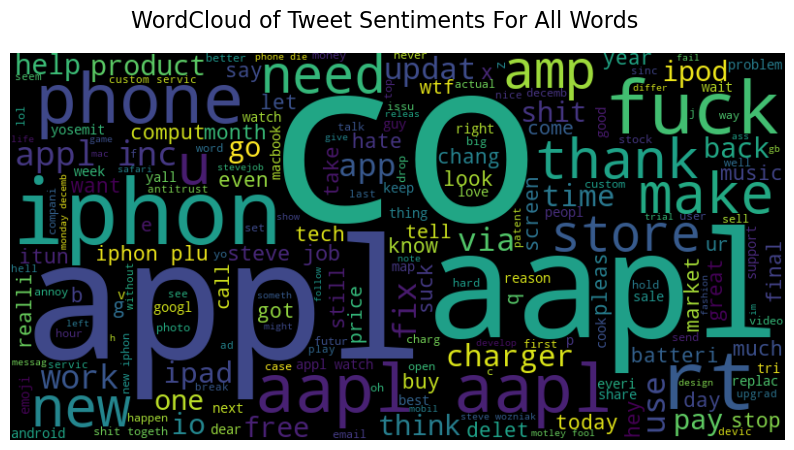

In [23]:
plt.figure(figsize=(10, 6))  
plt.suptitle('WordCloud of Tweet Sentiments For All Words', fontsize=16, y=0.89)  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Neutral Sentiment

In [24]:
neutral_words = ' '.join(tweet_df['stemmed_tweet'][tweet_df['sentiment']==0])

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='#000', random_state=42).generate(neutral_words)

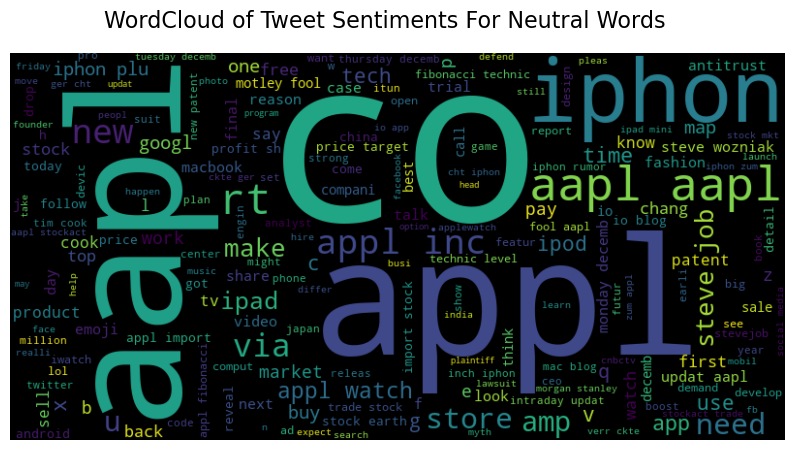

In [26]:
plt.figure(figsize=(10, 6))  
plt.suptitle('WordCloud of Tweet Sentiments For Neutral Words', fontsize=16, y=0.89) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Positive Sentiment

In [27]:
positive_words = ' '.join(tweet_df['stemmed_tweet'][tweet_df['sentiment']==1])

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='#000', random_state=42).generate(positive_words)

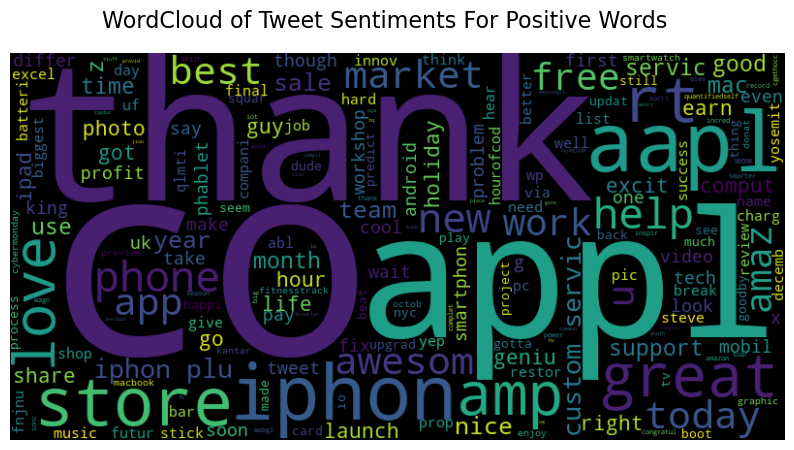

In [29]:
plt.figure(figsize=(10, 6))  
plt.suptitle('WordCloud of Tweet Sentiments For Positive Words', fontsize=16, y=0.89) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative Sentiment

In [30]:
negative_words = ' '.join(tweet_df['stemmed_tweet'][tweet_df['sentiment']==-1])

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='#000', random_state=42).generate(negative_words)

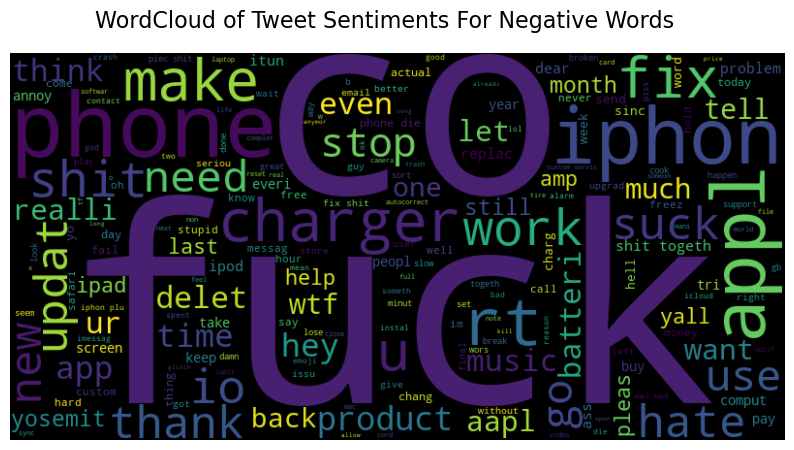

In [32]:
plt.figure(figsize=(10, 6))  
plt.suptitle('WordCloud of Tweet Sentiments For Negative Words', fontsize=16, y=0.89) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
def extractHashTag(tweets):
    hashtags = []
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags 

In [34]:
#extract hashtag from Neutral 
ht_neutral=extractHashTag(tweet_df['stemmed_tweet'][tweet_df['sentiment']==0])
ht_positive=extractHashTag(tweet_df['stemmed_tweet'][tweet_df['sentiment']==1])
ht_negative=extractHashTag(tweet_df['stemmed_tweet'][tweet_df['sentiment']==-1])

In [35]:
ht_neutral=sum(ht_negative,[])
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [36]:
freq = FreqDist(ht_neutral)
ned = pd.DataFrame({'HashTag': list(freq.keys()), 'Count': list(freq.values())})
ned.head()

HashTag  Count
0    note      1
1    aapl     26
2   iphon     20
3   ifail      1
4    maco      1

In [37]:
# top n number of hashtag
ned = ned.nlargest(10, columns='Count')

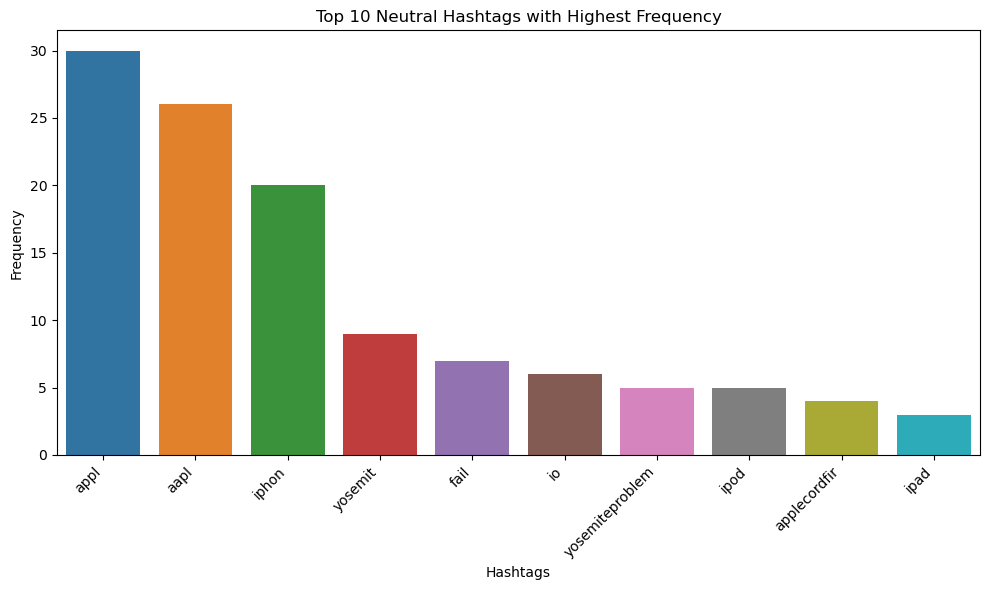

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HashTag', y='Count', data=ned)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Neutral Hashtags with Highest Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
freq = FreqDist(ht_positive)
pod = pd.DataFrame({'HashTag': list(freq.keys()), 'Count': list(freq.values())})
pod.head()

HashTag  Count
0    appl     13
1    aapl     20
2     mac      3
3      pc      2
4      tl      1

In [40]:
pod = pod.nlargest(10, columns='Count')

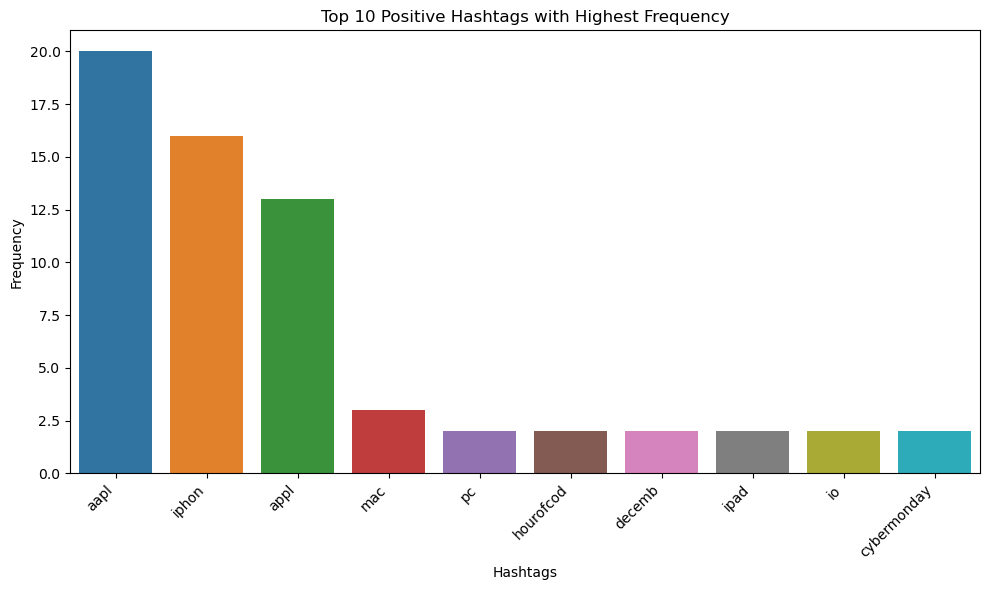

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HashTag', y='Count', data=pod)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Positive Hashtags with Highest Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
freq = FreqDist(ht_negative)
ned = pd.DataFrame({'HashTag': list(freq.keys()), 'Count': list(freq.values())})
ned.head()

HashTag  Count
0    note      1
1    aapl     26
2   iphon     20
3   ifail      1
4    maco      1

In [43]:
ned = ned.nlargest(10, columns='Count')

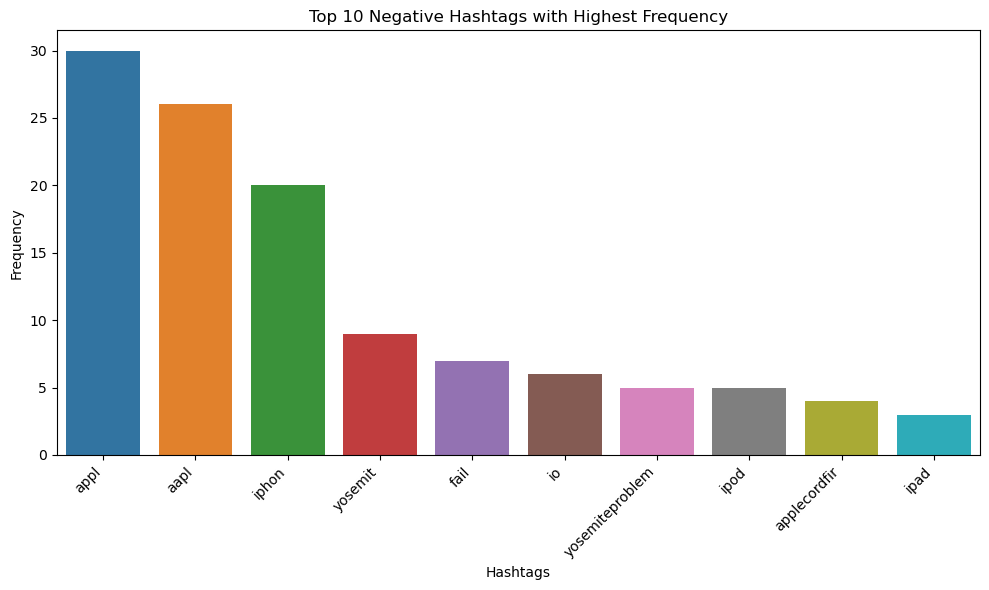

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HashTag', y='Count', data=ned)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Hashtags with Highest Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
tweet_df['category'] = tweet_df['sentiment'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

In [46]:
category_counts = tweet_df['category'].value_counts()

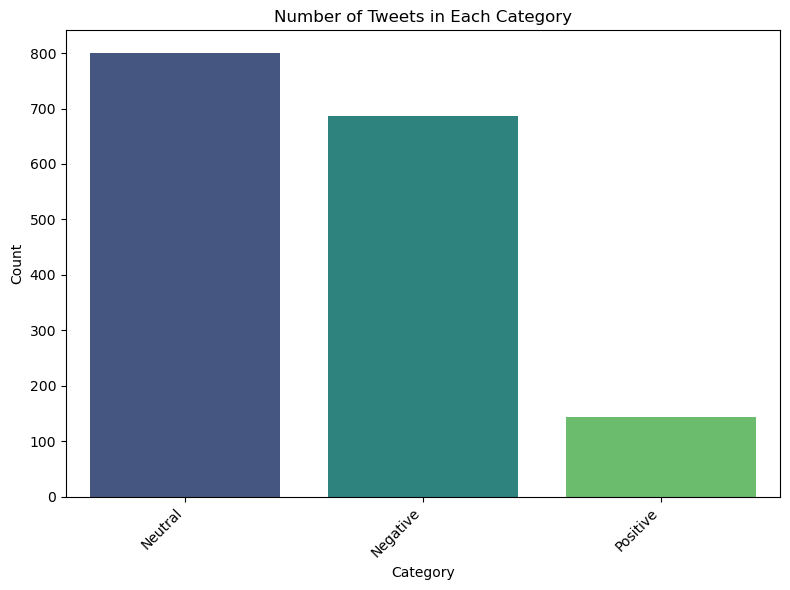

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Tweets in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
fig = px.pie(tweet_df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

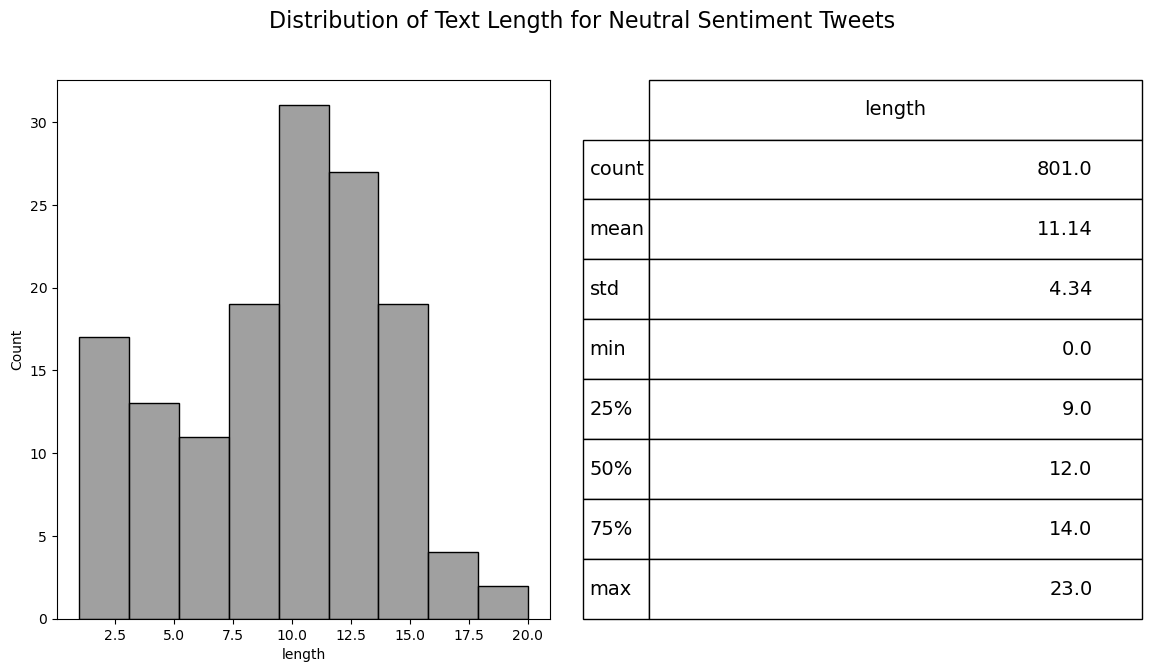

In [49]:
fig = plt.figure(figsize=(14, 7))

# Calculate the length of each tweet in terms of words
tweet_df['length'] = tweet_df['stemmed_tweet'].str.split().apply(len)

ax1 = fig.add_subplot(121)  # Swap subplot positions
sns.histplot(tweet_df[tweet_df['category'] == 'Positive']['length'], ax=ax1, color='gray')
describe = tweet_df['length'][tweet_df['category'] == 'Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)  # Swap subplot positions
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

fig.suptitle('Distribution of Text Length for Neutral Sentiment Tweets', fontsize=16)
plt.show()

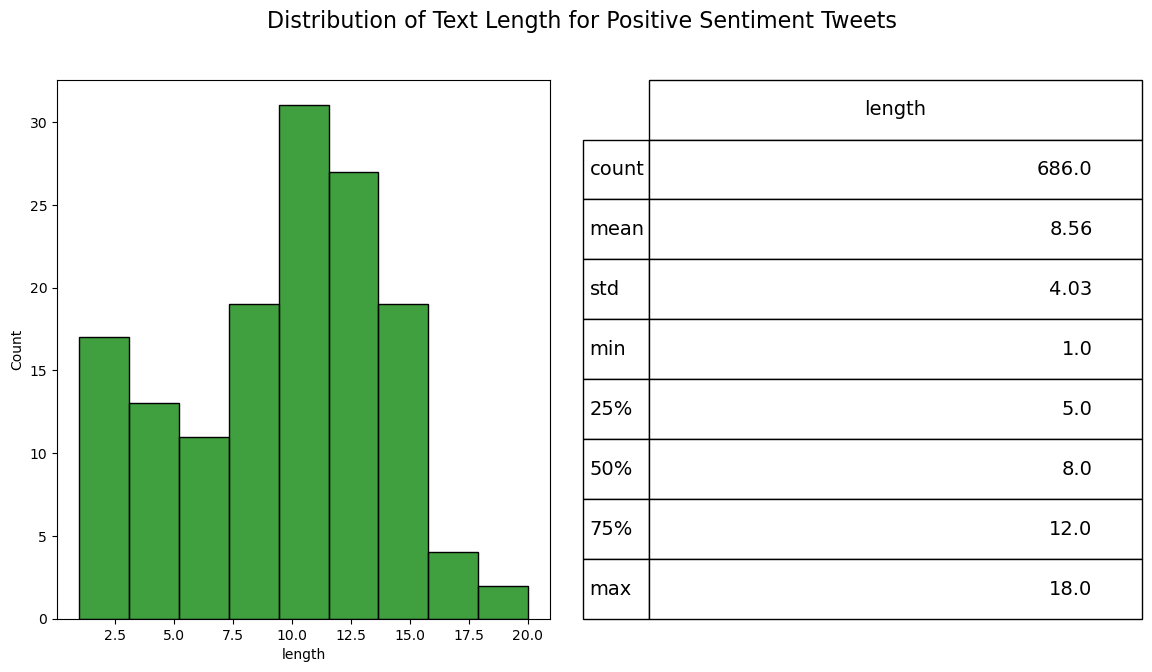

In [50]:
fig = plt.figure(figsize=(14, 7))

# Calculate the length of each tweet in terms of words
tweet_df['length'] = tweet_df['stemmed_tweet'].str.split().apply(len)

ax1 = fig.add_subplot(121)  # Swap subplot positions
sns.histplot(tweet_df[tweet_df['category'] == 'Positive']['length'], ax=ax1, color='green')
describe = tweet_df['length'][tweet_df['category'] == 'Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)  # Swap subplot positions
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

fig.suptitle('Distribution of Text Length for Positive Sentiment Tweets', fontsize=16)
plt.show()

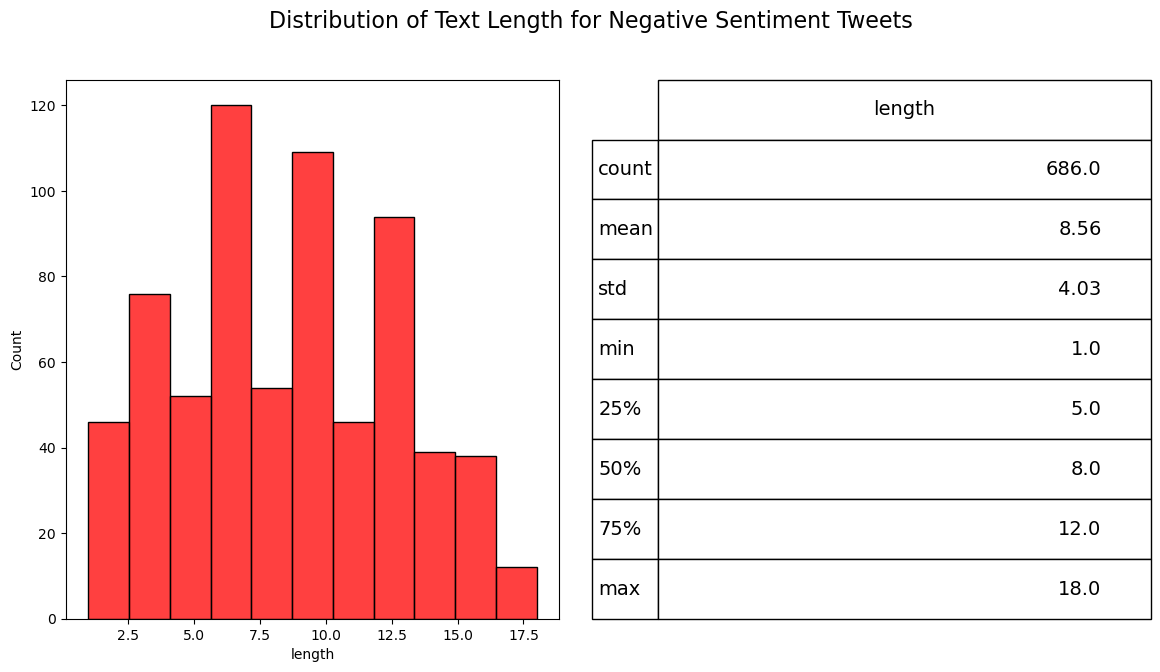

In [51]:
fig = plt.figure(figsize=(14, 7))

# Calculate the length of each tweet in terms of words
tweet_df['length'] = tweet_df['stemmed_tweet'].str.split().apply(len)

ax1 = fig.add_subplot(121)  # Swap subplot positions
sns.histplot(tweet_df[tweet_df['category'] == 'Negative']['length'], ax=ax1, color='red')
describe = tweet_df['length'][tweet_df['category'] == 'Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)  # Swap subplot positions
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

fig.suptitle('Distribution of Text Length for Negative Sentiment Tweets', fontsize=16)
plt.show()


# Input split

In [52]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(tweet_df['stemmed_tweet'])

In [53]:
new_bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
new_bow = new_bow_vectorizer.fit(tweet_df['stemmed_tweet'])
import pickle
with open('new_bow_vectorizer.pickle','wb') as f:
    pickle.dump(new_bow,f)

In [54]:
feature_names = bow_vectorizer.get_feature_names_out()

In [55]:
print("Bag-of-Words Matrix:")
print(bow.toarray())
print("Feature Names:")
print(feature_names)

Bag-of-Words Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
Feature Names:
['aapl' 'abl' 'absolut' 'access' 'accessori' 'accid' 'accord' 'accus'
 'act' 'action' 'actual' 'ad' 'adapt' 'add' 'address' 'advertis' 'af'
 'ago' 'agre' 'aid' 'aint' 'air' 'airmil' 'airmilesshop' 'aka' 'alabama'
 'alarm' 'album' 'alex' 'allow' 'alreadi' 'alt' 'alway' 'amaz' 'amazon'
 'amp' 'analysi' 'analyst' 'android' 'anger' 'annoy' 'anoth' 'answer'
 'anti' 'antitrust' 'anymor' 'anyon' 'app' 'appeal' 'appear' 'appl'
 'applecordfir' 'applepay' 'appletv' 'applewatch' 'approv' 'appstor'
 'asap' 'ask' 'ass' 'australia' 'auto' 'autocorrect' 'avail' 'aw' 'away'
 'awesom' 'baba' 'bad' 'badservic' 'ban' 'bank' 'bar' 'batteri' 'battl'
 'beat' 'becom' 'believ' 'bell' 'best' 'better' 'big' 'biggest' 'billion'
 'bit' 'bitch' 'black' 'blackberri' 'blame' 'block' 'blog' 'bloombergtv'
 'bm' 'board' 'bonu' 'book' 'boost' 'boot' 'bought' 'box' 'b

In [56]:
bow

<1630x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9984 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(bow, tweet_df['sentiment'], test_size=0.2, random_state=42)

# Model Training

In [59]:
logreg_model = LogisticRegression()

In [60]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = logreg_model.predict(X_test)

In [62]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [63]:
results_df.head(12)

Actual  Predicted
670        0          0
251        0          0
1225       0          0
300       -1         -1
352        0          0
350        0          0
1473       0         -1
1263      -1         -1
1004       0          0
1442       0          0
818        0          0
1577       1          1

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8159509202453987


In [65]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.77      0.81       137
           0       0.82      0.90      0.86       165
           1       0.60      0.50      0.55        24

    accuracy                           0.82       326
   macro avg       0.75      0.72      0.74       326
weighted avg       0.81      0.82      0.81       326



In [66]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[106  24   7]
 [ 16 148   1]
 [  4   8  12]]


In [67]:
cm = confusion_matrix(y_test, y_pred)

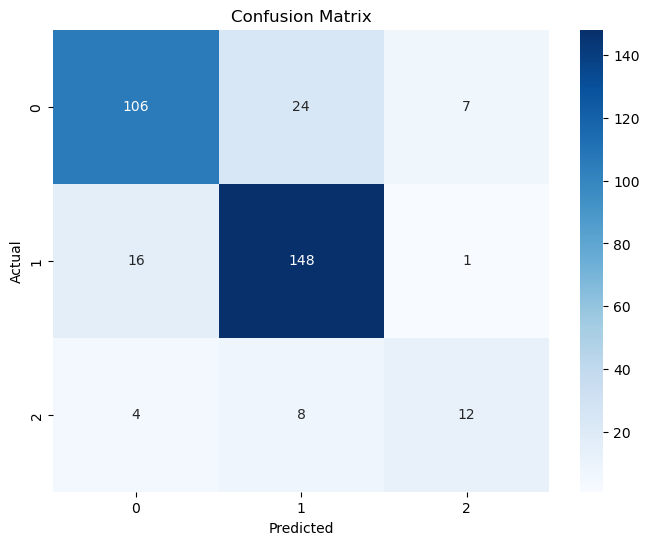

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [69]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
y_pred = dt_classifier.predict(X_test)

In [71]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [72]:
results_df.head(12)

Actual  Predicted
670        0          0
251        0          0
1225       0         -1
300       -1          0
352        0         -1
350        0          0
1473       0         -1
1263      -1         -1
1004       0          0
1442       0          0
818        0         -1
1577       1          0

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [74]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.70      0.69       137
           0       0.79      0.76      0.78       165
           1       0.39      0.38      0.38        24

    accuracy                           0.71       326
   macro avg       0.62      0.61      0.61       326
weighted avg       0.71      0.71      0.71       326



In [75]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 96  29  12]
 [ 37 126   2]
 [ 10   5   9]]


In [76]:
cm = confusion_matrix(y_test, y_pred)

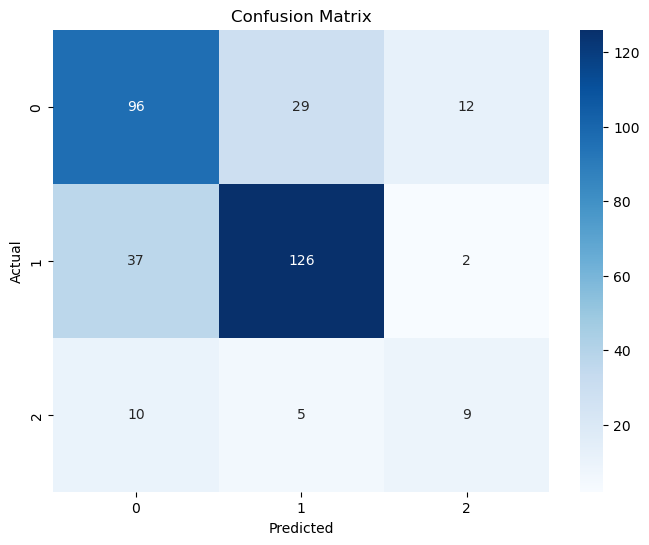

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred = rf_classifier.predict(X_test)

In [80]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [81]:
results_df.head(12)

Actual  Predicted
670        0          0
251        0          0
1225       0          0
300       -1         -1
352        0          0
350        0          0
1473       0          0
1263      -1         -1
1004       0          0
1442       0          0
818        0          0
1577       1          0

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [83]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.76      0.78       137
           0       0.82      0.87      0.84       165
           1       0.42      0.33      0.37        24

    accuracy                           0.79       326
   macro avg       0.68      0.66      0.66       326
weighted avg       0.78      0.79      0.78       326



In [84]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[104  24   9]
 [ 19 144   2]
 [  8   8   8]]


In [85]:
cm = confusion_matrix(y_test, y_pred)

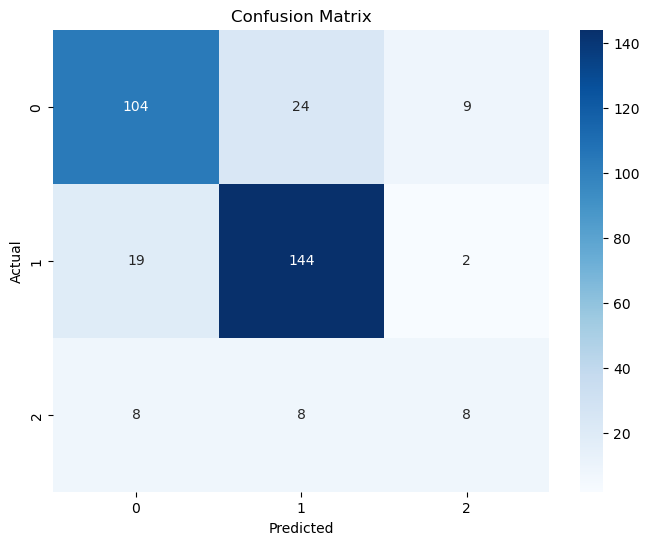

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
import pickle
with open('sentimental.pickle','wb') as f:
    pickle.dump(logreg_model,f)